# CS 195: Natural Language Processing
## Parsing

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F5_1_Parsing.ipynb)


## References

SLP: Context-Free Grammars and Constituency Parsing, Chapter 17 of *Speech and Language Processing* by Daniel Jurafsky & James H. Martin: https://web.stanford.edu/~jurafsky/slp3/17.pdf

NLTK Book Chapter 8: Analyzing Sentence Structure: https://www.nltk.org/book/ch08.html

Wikipedia article on CYK Parsing: https://en.wikipedia.org/wiki/CYK_algorithm

In [ ]:
import sys
!{sys.executable} -m pip install nltk svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Parsing

**Parsing** is the process of determining how a string fits a formal grammar.

For example: producing a parse tree for a given sentence and context-free grammar

## NLTK parsers

We saw last time how to define a grammar, create a parser object (`nltk.ChartParser(custom_grammar)`), and parse a sentence (`parser.parse(sentence`)

The `ChartParser` is a variation on the famous CKY parsing algorithm.
* Cocke-Kasami-Younger (CKY) algorithm
* Also independently discovered by (and first published by) Itiroo Sakai in 1961
* CKY requires the grammar to be in **Chomsky Normal Form**, but `ChartParser` doesn't


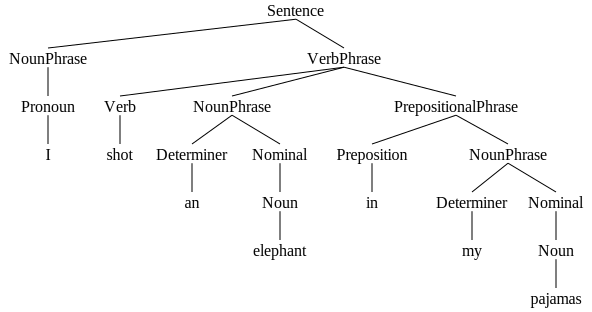

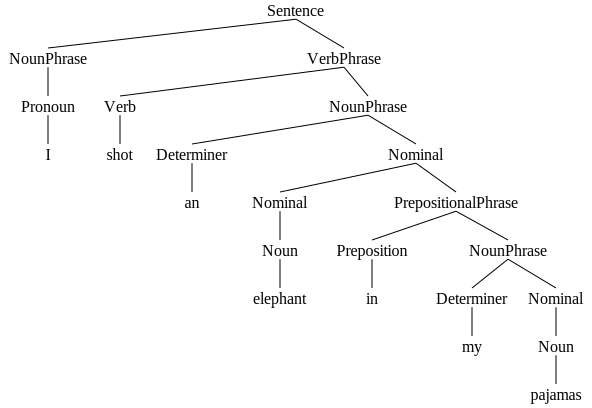

In [ ]:
import nltk


productions = [
    nltk.Production(nltk.Nonterminal('Sentence'), [nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('VerbPhrase')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Pronoun')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Determiner'), nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Nominal'), nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Nominal'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('PrepositionalPhrase'), [nltk.Nonterminal('Preposition'), nltk.Nonterminal('NounPhrase')]),

    # Productions for Determiner
    nltk.Production(nltk.Nonterminal('Determiner'), ['a']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['an']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['the']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['this']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['that']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['my']),
    # Add more Determiner productions as needed

    # Productions for Pronoun
    nltk.Production(nltk.Nonterminal('Pronoun'), ['me']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['I']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['you']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['it']),
    # Add more Pronoun productions as needed

    # Productions for Noun
    nltk.Production(nltk.Nonterminal('Noun'), ['flights']),
    nltk.Production(nltk.Nonterminal('Noun'), ['flight']),
    nltk.Production(nltk.Nonterminal('Noun'), ['breeze']),
    nltk.Production(nltk.Nonterminal('Noun'), ['trip']),
    nltk.Production(nltk.Nonterminal('Noun'), ['morning']),
    nltk.Production(nltk.Nonterminal('Noun'), ['elephant']),
    nltk.Production(nltk.Nonterminal('Noun'), ['pajamas']),
    # Add more Noun productions as needed

    # Productions for Verb
    nltk.Production(nltk.Nonterminal('Verb'), ['is']),
    nltk.Production(nltk.Nonterminal('Verb'), ['prefer']),
    nltk.Production(nltk.Nonterminal('Verb'), ['like']),
    nltk.Production(nltk.Nonterminal('Verb'), ['need']),
    nltk.Production(nltk.Nonterminal('Verb'), ['want']),
    nltk.Production(nltk.Nonterminal('Verb'), ['fly']),
    nltk.Production(nltk.Nonterminal('Verb'), ['do']),
    nltk.Production(nltk.Nonterminal('Verb'), ['shot']),
    # Add more Verb productions as needed

    # Productions for Preposition
    nltk.Production(nltk.Nonterminal('Preposition'), ['from']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['to']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['on']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['near']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['in']),
    # Add more Preposition productions as needed
]

custom_grammar = nltk.CFG(nltk.Nonterminal('Sentence'), productions)

parser = nltk.ChartParser(custom_grammar)
sentence = "I shot an elephant in my pajamas".split()
for tree in parser.parse(sentence):
    display(tree)

## The CFG we left off with

<table>
  <tr>
    <td style="text-align: right;"><em>Sentence</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>NounPhrase</em> <em>VerbPhrase</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>NounPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Pronoun</em> | <em>Determiner</em> <em>Nominal</em> | <em>Nominal</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Nominal</em></td>
    <td style="text-align: center;">&rarr;</td>
      <td style="text-align: left;"><em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PrepositionalPhrase</em> | <em>Noun</em> </td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>VerbPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NounPhrase</em> | <em>Verb</em> <em>NounPhrase</em> <em>PropositionalPhrase</em> | <em>Verb</em> <em>PrepositionalPhrase</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>PrepositionalPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Preposition</em> <em>NounPhrase</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Determiner</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>a</code> | <code>an</code> | <code>the</code> | <code>this</code> | <code>that</code> | <code>my</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Noun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Verb</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>is</code> | <code>prefer</code> | <code>like</code> | <code>need</code> | <code>want</code> | <code>fly</code> | <code>do</code> | <code>shot</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Preposition</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>from</code> | <code>to</code> | <code>on</code> | <code>near</code> | <code>in</code> | ...</td>
  </tr>
</table>


## Chomsky Normal Form

A context-free grammar in **Chomsky Normal Form** (CNF) is only allowed two kinds of rules

1. Rules with two nonterminals on the right-hand side

  <tr>
    <td style="text-align: right;"><em>A</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>B</em> <em>C</em></td>
  </tr>
  
2. Rules with a single terminal on the right-hand side and nothing else

  <tr>
    <td style="text-align: right;"><em>A</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>terminal</code></td>
  </tr>
  
  
Every context-free grammar can be converted into an equivalent grammar in CNF.

## CNF Conversion Example

Rules like this are already ok

<table>
  <tr>
    <td style="text-align: right;"><em>Sentence</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>NounPhrase</em> <em>VerbPhrase</em></td>
  </tr>
</table>  

For rules that have more than two nonterminals, add a new *dummy* nonterminal
  
<table>
<tr>
    <td style="text-align: right;"><em>VerbPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NounPhrase</em> <em>PropositionalPhrase</em></td>
</tr>
</table>
becomes
<table>
<tr>
    <td style="text-align: right;"><em>VerbPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>X</em> <em>PropositionalPhrase</em></td>
</tr>
<tr>
    <td style="text-align: right;"><em>X</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NounPhrase</em></td>
</tr>
</table>

Flatten rules with a single non-terminal

<table>
  <tr>
    <td style="text-align: right;"><em>NounPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Pronoun</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
</table>

becomes

<table>
  <tr>
    <td style="text-align: right;"><em>NounPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ... </td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
</table>

## CNF version of our grammar

<table>
  <tr>
    <td style="text-align: right;"><em>S</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>NP</em> <em>VP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>NP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Det</em> <em>Nominal</em> |</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
    <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Nominal</em></td>
    <td style="text-align: center;">&rarr;</td>
      <td style="text-align: left;"><em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
      <td style="text-align: left;">| <code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>VP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NP</em> | <em>X</em> <em>PP</em> | <em>Verb</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>X</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>PP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Preposition</em> <em>NP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Det</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>a</code> | <code>an</code> | <code>the</code> | <code>this</code> | <code>that</code> | <code>my</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Noun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Verb</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>is</code> | <code>prefer</code> | <code>like</code> | <code>need</code> | <code>want</code> | <code>fly</code> | <code>do</code> | <code>shot</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Preposition</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>from</code> | <code>to</code> | <code>on</code> | <code>near</code> | <code>in</code> | ...</td>
  </tr>
</table>


## CKY Algorithm



**Review:** an n-gram is a sequence of n consecutive words


**CKY Algorithm**

for each 1-gram (`word`) in the sentence
* make note of all productions that `word` appears on the right side of (like *A* &rarr; `word`)
    
for each n from 2 to the number of words in the sentence
* for each n-gram in the sentence
    * for each possible partition of the n-gram into two parts
        * make note of all productions of the form *A* &rarr; *B* *C* where *B* matches the first part and *C* matches the second part

## Algorithm Demo

Let's walk through how this algorithm works on the whiteboard.

Sentence: "I shot an elephant in my pajamas"

<table>
  <tr>
    <td style="text-align: right;"><em>S</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>NP</em> <em>VP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>NP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Det</em> <em>Nominal</em> |</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
    <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Nominal</em></td>
    <td style="text-align: center;">&rarr;</td>
      <td style="text-align: left;"><em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
      <td style="text-align: left;">| <code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>VP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NP</em> | <em>X</em> <em>PP</em> | <em>Verb</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>X</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>PP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Preposition</em> <em>NP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Det</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>a</code> | <code>an</code> | <code>the</code> | <code>this</code> | <code>that</code> | <code>my</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Noun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Verb</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>is</code> | <code>prefer</code> | <code>like</code> | <code>need</code> | <code>want</code> | <code>fly</code> | <code>do</code> | <code>shot</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Preposition</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>from</code> | <code>to</code> | <code>on</code> | <code>near</code> | <code>in</code> | ...</td>
  </tr>
</table>

### Completed diagram for your notes

Apologies for the low-tech image

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/cky_example.jpg?raw=1" width = 700/>
</div>

### Checking our work with NLTK's ChartParser

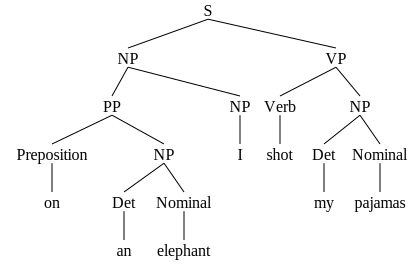

In [ ]:
import nltk

#since last class I discovered this nifty way of defining the grammar
#that doesn't involve all the nltk.Production and nltk.Nonterminal objects
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det Nominal
    NP ->  'me' | 'I' | 'you' | 'it'
    NP -> Nominal Noun | Nominal PP
    NP -> 'flights' | 'flight' | 'breeze' | 'trip' | 'morning' | 'elephant' | 'pajamas'
    Nominal -> Nominal Noun | Nominal PP
    Nominal -> 'flights' | 'flight' | 'breeze' | 'trip' | 'morning' | 'elephant' | 'pajamas'
    VP -> Verb NP | X PP | Verb PP
    X -> Verb NP
    PP -> Preposition NP
    Det -> 'a' | 'an' | 'the' | 'this' | 'that' | 'my'
    Pronoun -> 'me' | 'I' | 'you' | 'it'
    Noun -> 'flights' | 'flight' | 'breeze' | 'trip' | 'morning' | 'elephant' | 'pajamas'
    Verb -> 'is' | 'prefer' | 'like' | 'need' | 'want' | 'fly' | 'do' | 'shot'
    Preposition -> 'from' | 'to' | 'on' | 'near' | 'in'
    """)

parser = nltk.ChartParser(grammar)
sentence = "on an elephant I shot my pajamas".split()
for tree in parser.parse(sentence):
    display(tree)

## Group Exercise

Parse the sentence "I need a morning flight" by hand

<table>
  <tr>
    <td style="text-align: right;"><em>S</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>NP</em> <em>VP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>NP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Det</em> <em>Nominal</em> |</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
    <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Nominal</em></td>
    <td style="text-align: center;">&rarr;</td>
      <td style="text-align: left;"><em>Nominal</em> <em>Noun</em> | <em>Nominal</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
      <td style="text-align: left;">| <code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>VP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NP</em> | <em>X</em> <em>PP</em> | <em>Verb</em> <em>PP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>X</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>PP</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Preposition</em> <em>NP</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Det</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>a</code> | <code>an</code> | <code>the</code> | <code>this</code> | <code>that</code> | <code>my</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Noun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Verb</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>is</code> | <code>prefer</code> | <code>like</code> | <code>need</code> | <code>want</code> | <code>fly</code> | <code>do</code> | <code>shot</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Preposition</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>from</code> | <code>to</code> | <code>on</code> | <code>near</code> | <code>in</code> | ...</td>
  </tr>
</table>

## Applied Exploration

Come up with a sentence that is structurally different that the examples and exercises we've done so far.
* Work out the CKY chart by hand - take a photo and attach it with your portfolio
* Compare the hand-computed trees against what `nltk.ChartParser` produces
* Describe: do they match?

Feel free to add rules to the grammar, especially to increase the vobulary.

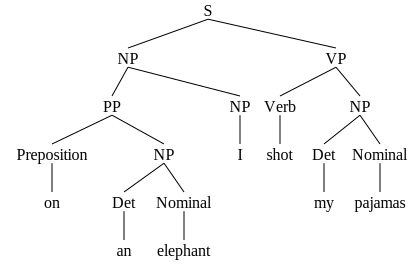

In [ ]:
import nltk

#since last class I discovered this nifty way of defining the grammar
#that doesn't involve all the nltk.Production and nltk.Nonterminal objects
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> PP NP
    NP -> Det Nominal
    NP ->  'me' | 'I' | 'you' | 'it'
    NP -> Nominal Noun | Nominal PP
    NP -> 'flights' | 'flight' | 'breeze' | 'trip' | 'morning' | 'elephant' | 'pajamas'
    Nominal -> Nominal Noun | Nominal PP
    Nominal -> 'flights' | 'flight' | 'breeze' | 'trip' | 'morning' | 'elephant' | 'pajamas'
    VP -> Verb NP | X PP | Verb PP
    X -> Verb NP
    PP -> Preposition NP
    Det -> 'a' | 'an' | 'the' | 'this' | 'that' | 'my'
    Pronoun -> 'me' | 'I' | 'you' | 'it'
    Noun -> 'flights' | 'flight' | 'breeze' | 'trip' | 'morning' | 'elephant' | 'pajamas'
    Verb -> 'is' | 'prefer' | 'like' | 'need' | 'want' | 'fly' | 'do' | 'shot'
    Preposition -> 'from' | 'to' | 'on' | 'near' | 'in'
    """)

parser = nltk.ChartParser(grammar)
sentence = "on an elephant I shot my pajamas".split()
for tree in parser.parse(sentence):
    display(tree)

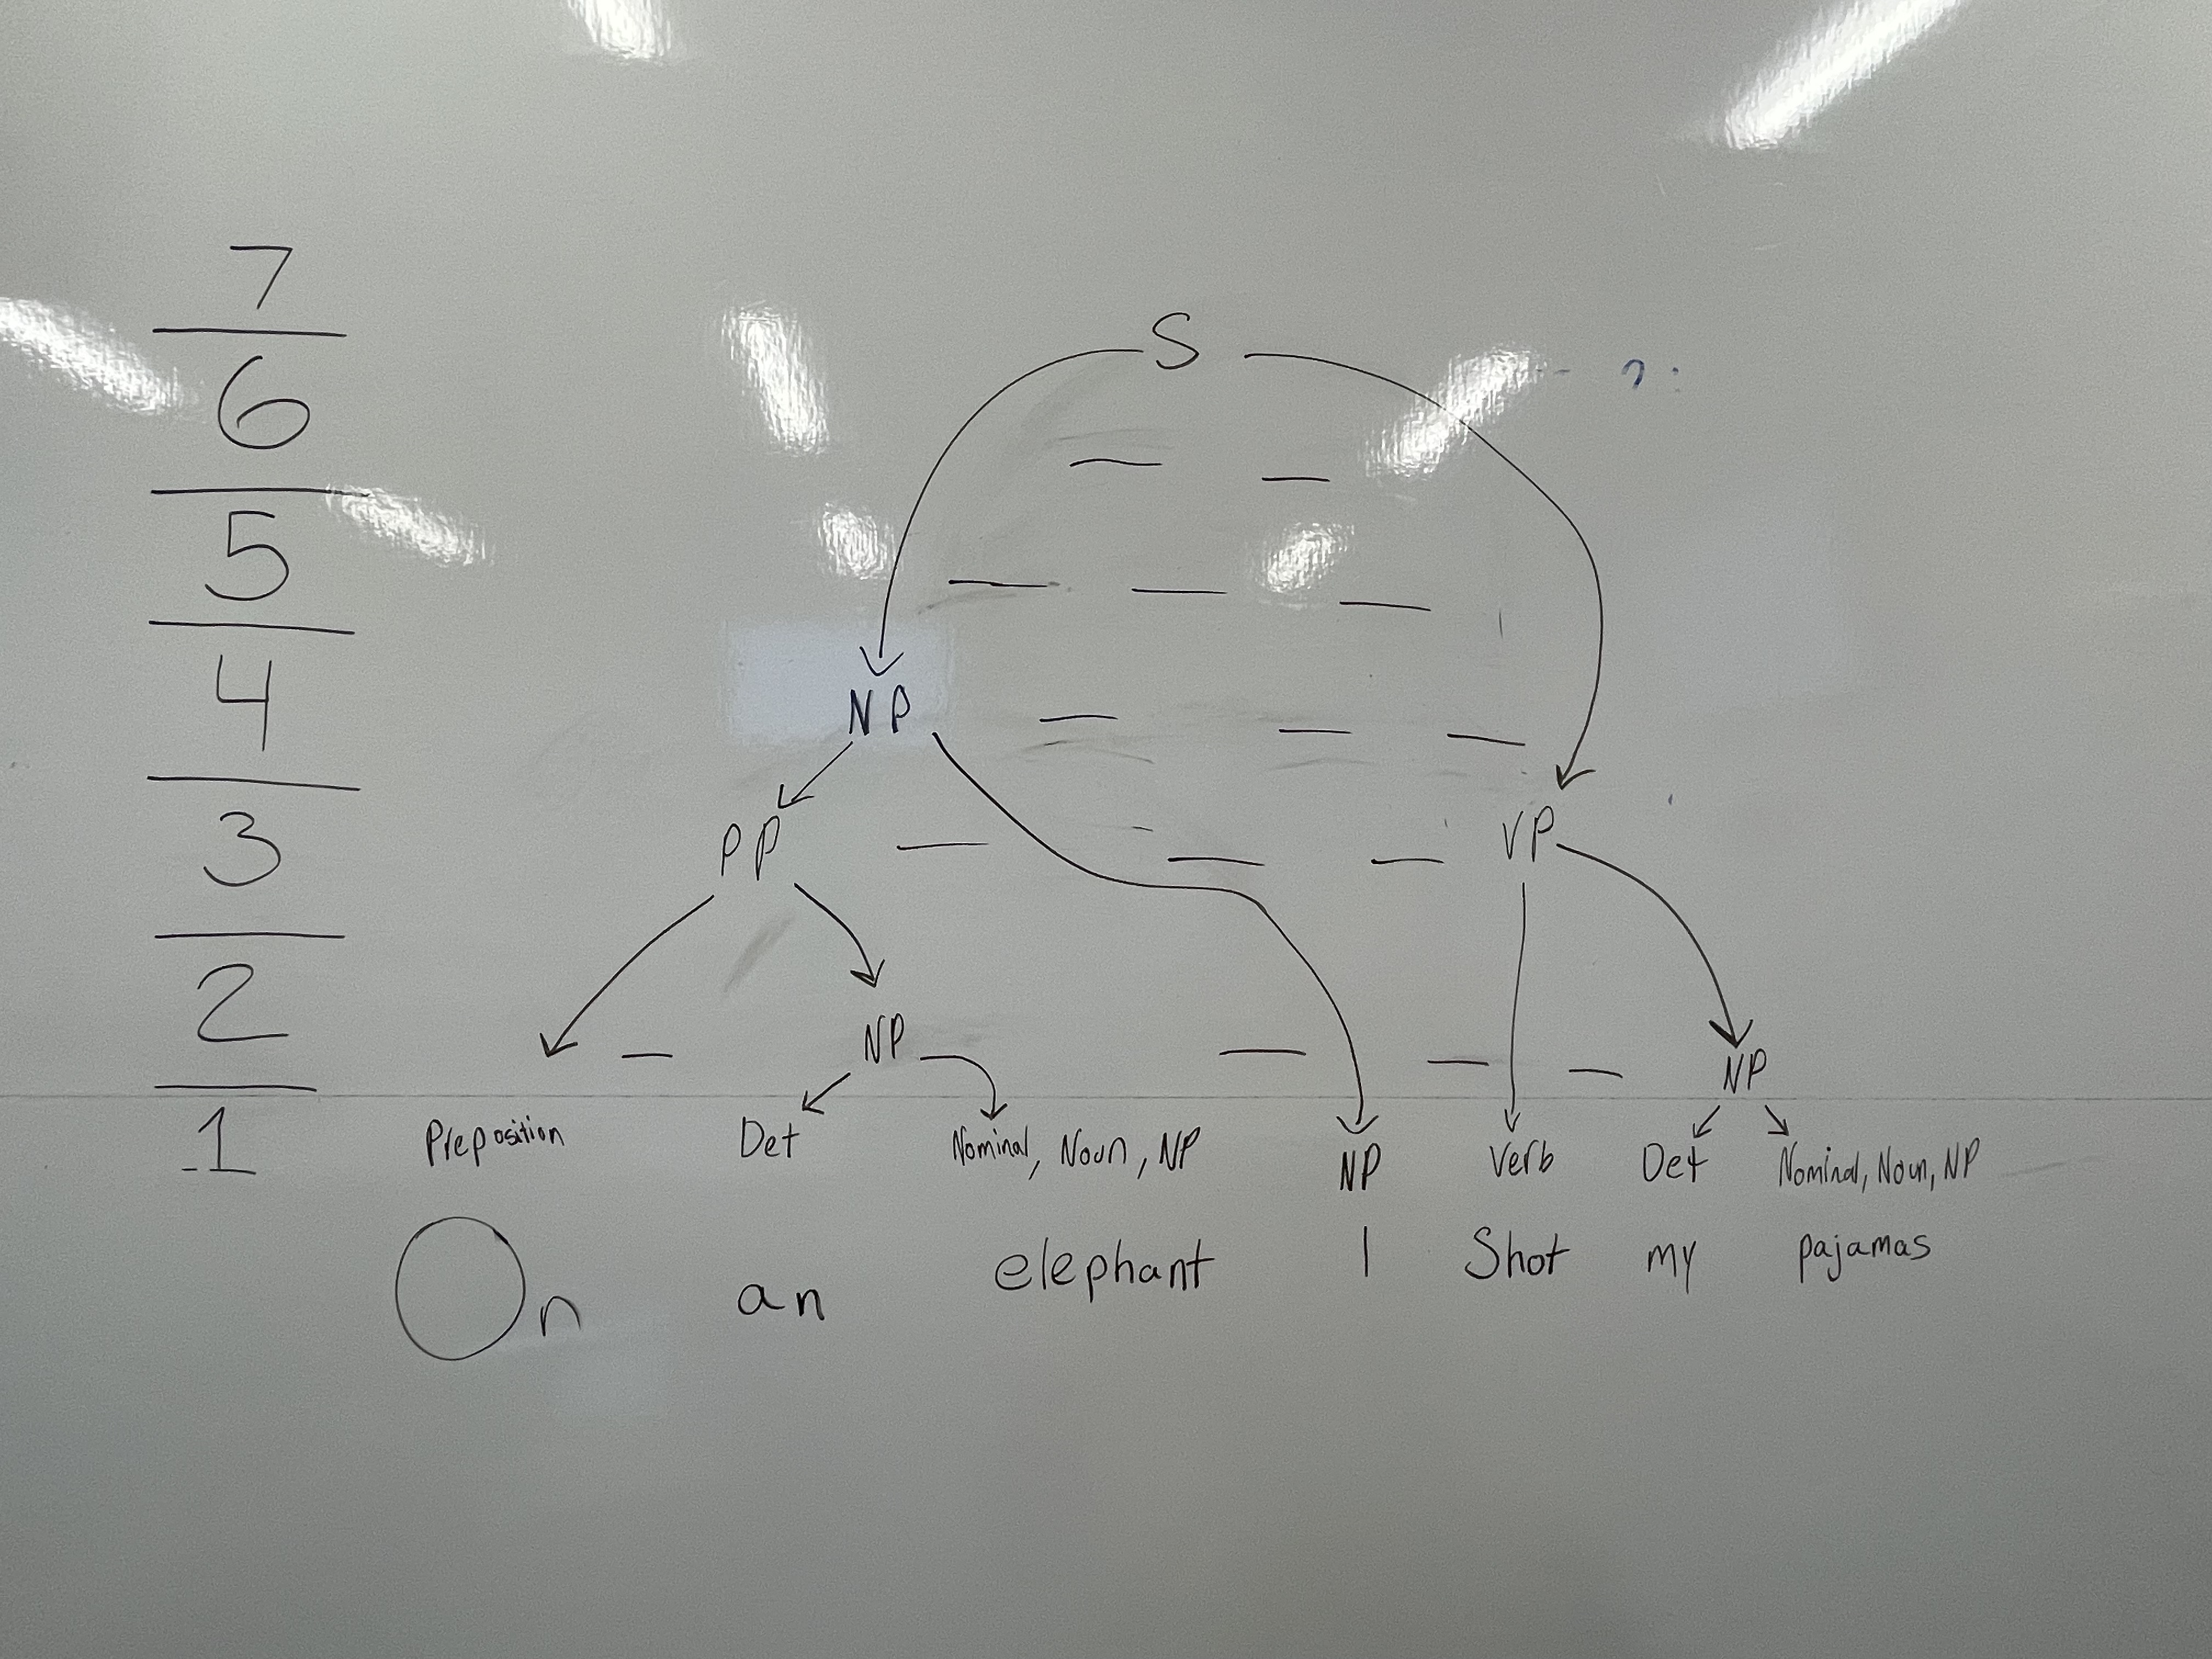



Applied Exploration Discussion

## Creative Synthesis Ideas

Recall: This is the code for inferring the Penn Treebank Grammar

One problem - this grammar has a limited vocabulary.
* Note: I had to sub a word for `pajamas`

Another problem - this may take a while to run
* I suspect that it could be improved by only including the
  <tr>
    <td style="text-align: right;"><em>A</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>terminal</code></td>
  </tr>
rules for words that are actually in the sentence you're parsing.

Ideas
* Make the parts-of-speech the terminals and to POS-tagging before parsing
* Use WordNet to get the list of possible parts-of-speech for each word, and include rules only for those
* You will need to edit the grammar or only include productions without terminals - will need some exploration

In [ ]:
import nltk
from nltk.corpus import treebank

# Download the Penn Treebank corpus
#nltk.download('treebank')

# Extract and prepare treebank sentences
treebank_sents = treebank.parsed_sents()

# go through each parsed sentence and put its production
# into a big list of productions
productions = []
for sent in treebank.parsed_sents():
    for curr_production in sent.productions():
        productions.append( curr_production )

treebank_grammar = nltk.CFG(nltk.Nonterminal('S'), productions)

parser = nltk.ChartParser(treebank_grammar)
sentence = "I shot an elephant in my car".split()
for tree in parser.parse(sentence):
    display(tree)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
